In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 144)

# Make dataset from simulation results

There are several groups of simulation results about water age:

* reclamation: "cSS01_MM_LL.csv"

* rehabitation: "cSS03_MM_LL.csv"

* SS: 00, 03, 10, 20, representing different SLR scenarios: 0, 0.3, 1.0, and 2.0 meters.

* MM: from 00 to 12, representing month, 00 is annual average.

* LL: from 00 to 20, representing sigma layer of water.

Therefore, a new dataset will be made in the following format:

|      Column 	| Description                                                                    	|
|------------:	|--------------------------------------------------------------------------------	|
|       `lat` 	| Lat of points in Tokyo Bay                                                                            	|
|       `lon` 	| Lon of points in Tokyo Bay                                                                         	|
|   `sigma_z` 	| Sigma Z of points, from 0 to 20, representing sea surface to bottom 	|
|   `slr_hgt` 	| SLR hight, from 0 to 2.0 meters, we have 0, 0.2, 1.0, and 2.0 data.            	|
|  `nbs_case` 	| NbS case, we have two case, 0 for reclamation case, 1 for rehabitation case.   	|
| `water_age` 	| The estimated water age by coastal circulation model                           	|

In [2]:
data = {'lat': [], 
        'lon': [], 
        'sigma_z': [], 
        'slr_hgt': [], 
        'nbs_case': [], 
        'water_age': []} 

In [3]:
for ss in [0,3,10,20]:
    for nbs in [1,3]:
        for ll in [var for var in range(1,21)]:
            filepath = '../csv_files_ml/c{0:02d}{1:02d}_m00_{2:02d}.csv'.format(ss,nbs,ll)
            # print(filepath)
            df = pd.read_csv(filepath,names=['lon','lat','water_age'],
                             header=None,index_col=False)
            df['water_age'] = pd.to_numeric(df['water_age'],errors='coerce')
            data['lat'] += df['lat'].values.tolist()
            data['lon'] += df['lon'].values.tolist()
            data['water_age'] += df['water_age'].values.tolist()
            data['sigma_z'] += [ll]*df.shape[0]
            data['slr_hgt'] += [ss/10]*df.shape[0]
            data['nbs_case'] += [nbs]*df.shape[0]

In [4]:
data = pd.DataFrame.from_dict(data)

In [5]:
data.head()

,lat,lon,sigma_z,slr_hgt,nbs_case,water_age
0,34.976126,139.766126,1,0.0,1,62.52
1,34.976126,139.770631,1,0.0,1,66.29
2,34.976126,139.775135,1,0.0,1,69.46
3,34.976126,139.779640,1,0.0,1,72.80
4,34.976126,139.784144,1,0.0,1,76.97


In [6]:
data.shape

(1081120, 6)

In [7]:
data.describe()

,lat,lon,sigma_z,slr_hgt,nbs_case,water_age
count,1.081120e+06,1.081120e+06,1.081120e+06,1.081120e+06,1081120.0,1.057520e+06
mean,3.538271e+01,1.398274e+02,1.050000e+01,8.250000e-01,2.0,5.081996e+01
std,1.842621e-01,1.028810e-01,5.766284e+00,7.693345e-01,1.0,1.591054e+01
min,3.497613e+01,1.396265e+02,1.000000e+00,0.000000e+00,1.0,-4.624000e+02
25%,3.523739e+01,1.397526e+02,5.750000e+00,2.250000e-01,1.0,4.298000e+01
50%,3.541757e+01,1.398067e+02,1.050000e+01,6.500000e-01,2.0,5.066000e+01
75%,3.553469e+01,1.398923e+02,1.525000e+01,1.250000e+00,3.0,5.970000e+01
max,3.569685e+01,1.401130e+02,2.000000e+01,2.000000e+00,3.0,3.859800e+02


In [8]:
data.drop(data[data['water_age'] < 0].index, inplace = True)

In [9]:
data.isnull().sum()

lat              0
lon              0
sigma_z          0
slr_hgt          0
nbs_case         0
water_age    23600
dtype: int64

In [10]:
data[data.isna().any(axis=1)].head()

,lat,lon,sigma_z,slr_hgt,nbs_case,water_age
3939,35.462613,139.707568,1,0.0,1,NaN
3940,35.462613,139.712072,1,0.0,1,NaN
3941,35.462613,139.716577,1,0.0,1,NaN
3942,35.462613,139.721081,1,0.0,1,NaN
4008,35.467117,139.707568,1,0.0,1,NaN


In [11]:
data.dropna(subset = ["water_age"], inplace=True)

In [12]:
data['sigma_z'].value_counts()

1     52772
12    52772
19    52772
18    52772
17    52772
16    52772
15    52772
14    52772
13    52772
11    52772
10    52772
9     52772
8     52772
7     52772
6     52772
5     52772
4     52772
3     52772
20    52772
2     52771
Name: sigma_z, dtype: int64

In [13]:
data['slr_hgt'].value_counts()

0.0    263860
0.3    263860
1.0    263860
2.0    263859
Name: slr_hgt, dtype: int64

In [14]:
data['nbs_case'].value_counts()

3    539519
1    515920
Name: nbs_case, dtype: int64

In [15]:
data['lat'].value_counts()

35.476126    11680
35.575225    11600
35.471622    11360
35.449099    11360
35.566216    11360
             ...  
35.678829      960
35.687838      800
35.683333      480
35.692342      480
35.696847      160
Name: lat, Length: 161, dtype: int64

In [16]:
data['lon'].value_counts()

139.788649    22079
139.784144    21840
139.793153    21760
139.770631    21680
139.775135    21680
              ...  
140.099459      640
140.108468      640
140.112973      480
140.103964      480
139.626486      320
Name: lon, Length: 109, dtype: int64

In [17]:
data.to_csv('data.csv',index=False)

# Data visualization



In [18]:
df = data.copy()

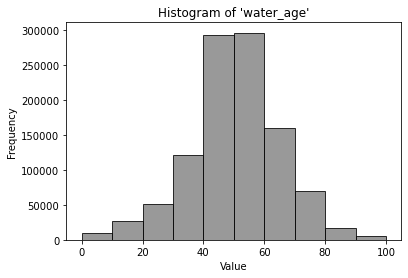

In [19]:
def plot_histogram(x):
    plt.hist(x, color='gray', edgecolor='black', alpha=0.8, range=[0,100])
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()
    
# Plot distribution of traget (outcome) variable in the training data
plot_histogram(df['water_age'])

/Users/yulong/anaconda3/envs/hacker/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 100.0)

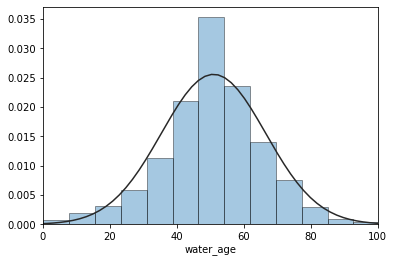

In [20]:
from scipy.stats import norm
#plt.figure(figsize=(10,7))
ax = sns.distplot(df['water_age'], 
                  bins = 50, kde=False,fit=norm, 
                  hist_kws=dict(edgecolor="k", linewidth=1))
ax.set_xlim(0,100)

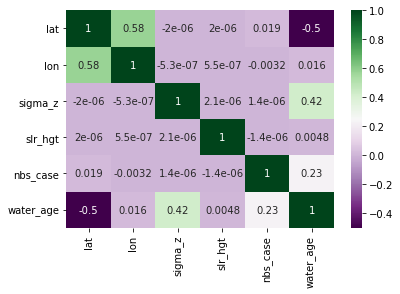

In [21]:
sns.heatmap(df.corr(), cmap='PRGn', annot=True);

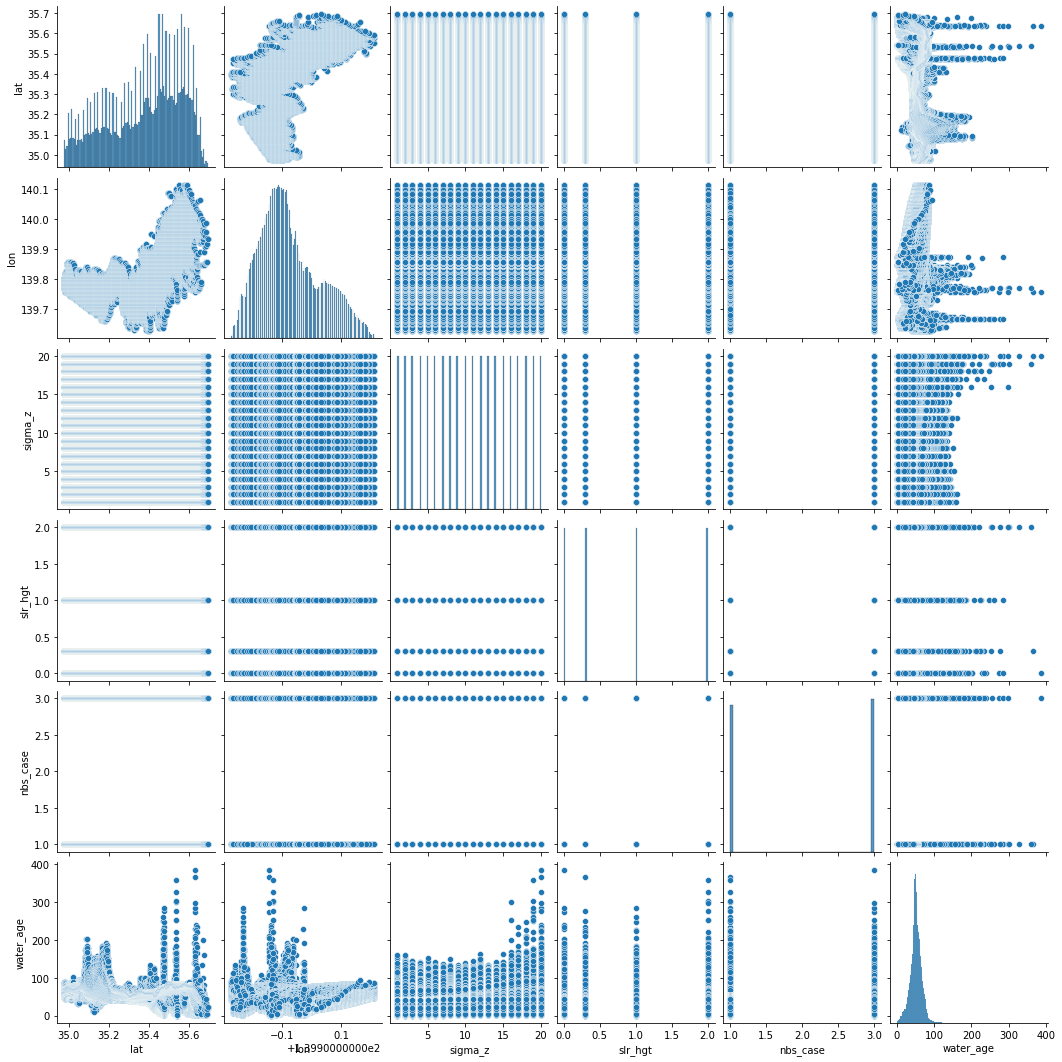

In [22]:
sns.pairplot(df)

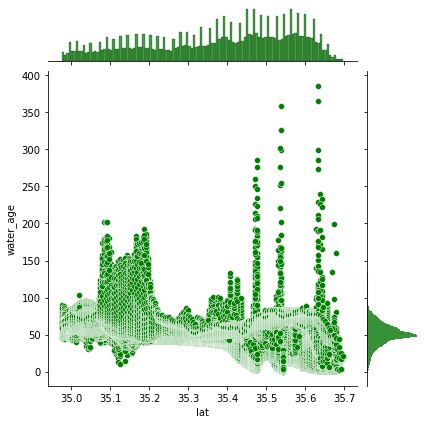

In [23]:
sns.jointplot(x='lat', y='water_age', color= "green", data= df)

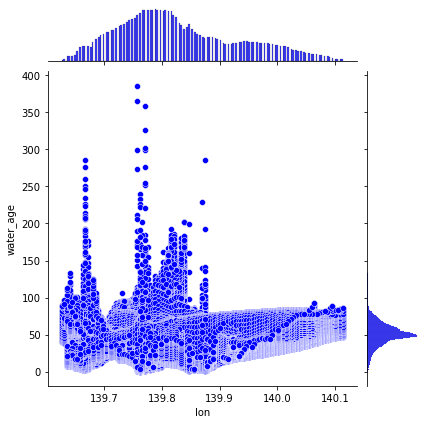

In [24]:
sns.jointplot(x='lon', y='water_age', color= "blue", data= df)

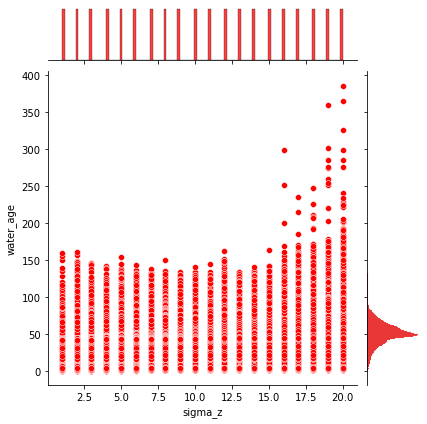

In [25]:
sns.jointplot(x='sigma_z', y='water_age', color= "red", data= df)

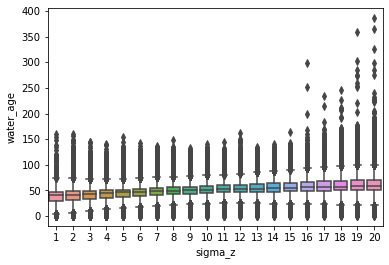

In [26]:
#plt.figure(figsize=(20,10))
ax = sns.boxplot(x="sigma_z", y="water_age", data=df)

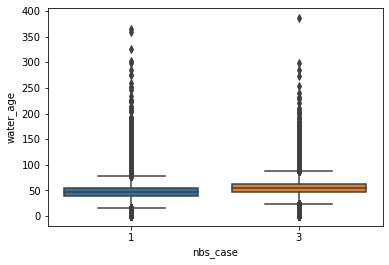

In [27]:
ax = sns.boxplot(x="nbs_case", y="water_age", data=df)

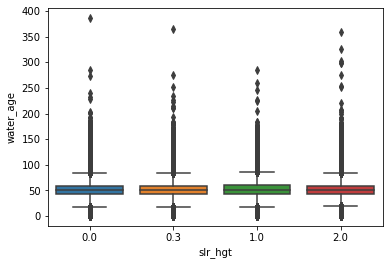

In [28]:
ax = sns.boxplot(x="slr_hgt", y="water_age", data=df)

# Random Forest Regression

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

from pprint import pprint

In [30]:
# Create outcome and input DataFrames
y = df['water_age'] 
X = df.drop('water_age', axis=1)
y.head()

0    62.52
1    66.29
2    69.46
3    72.80
4    76.97
Name: water_age, dtype: float64

In [31]:
X_train, X_test, Y_train, Y_test= train_test_split(X, y,test_size=0.25, random_state = 42)

In [32]:
print('Training Features Shape:', X_train.shape)
print('Training Target Shape:', Y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Target Shape:', Y_test.shape)

Training Features Shape: (791579, 5)
Training Target Shape: (791579,)
Testing Features Shape: (263860, 5)
Testing Target Shape: (263860,)


In [33]:
rf = RandomForestRegressor(random_state = 42)

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [34]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, Y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
rf_random.best_params_